<a href="https://colab.research.google.com/github/jaemyoung/Dacon_Gas_Supply_Forecast/blob/hyunho/Dacon_Gas_Predict%20EDA(ing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 그래프 한글폰트 사용설정 in Colab - 한번 실행 후 폰트가 깨진다면 런타임 다시시작 후 한번 더 실행

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

fontpath = '("/content/drvie/MyDrive/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

## Test
plt.figure(figsize=(3,3))
plt.text(0.5, 0.5, '한글 폰트 테스트 성공!!!', size=15)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
plt.style.use("ggplot")
warnings.filterwarnings('ignore')
import os 
from google.colab import drive
drive.mount('/content/drvie/')
df= pd.read_csv("/content/drvie/MyDrive/프로젝트 list/전자제조 프로젝트/train.csv",encoding='cp949')

Mounted at /content/drvie/


In [37]:
tempt= pd.read_csv("/content/drvie/MyDrive/프로젝트 list/전자제조 프로젝트/일별 평균기온.csv",encoding='cp949')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   일시       2191 non-null   object 
 1   평균기온(℃)  2191 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.4+ KB


In [43]:
tempt.columns=['date','mean_temp']
tempt['date'] = pd.to_datetime(tempt['date'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [67]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures, RobustScaler

In [45]:
tempt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       2191 non-null   datetime64[ns]
 1   mean_temp  2191 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.4 KB


In [44]:
tempt.head()

,date,mean_temp
0,2013-01-01,-3.2
1,2013-01-02,-6.0
2,2013-01-03,-9.9
3,2013-01-04,-9.0
4,2013-01-05,-5.9


In [55]:
df.head(100)

,date,time,sep,target,year,month,day,weekday
0,2013-01-01,1,A,2497.129,2013,1,1,1
1,2013-01-01,2,A,2363.265,2013,1,1,1
2,2013-01-01,3,A,2258.505,2013,1,1,1
3,2013-01-01,4,A,2243.969,2013,1,1,1
4,2013-01-01,5,A,2344.105,2013,1,1,1
...,...,...,...,...,...,...,...,...
95,2013-01-04,24,A,3153.801,2013,1,4,4
96,2013-01-05,1,A,2918.889,2013,1,5,5
97,2013-01-05,2,A,2662.985,2013,1,5,5
98,2013-01-05,3,A,2498.657,2013,1,5,5


In [50]:
temp_df = pd.merge(df, tempt)
temp_df.head()

,date,time,sep,target,year,month,day,weekday,mean_temp
0,2013-01-01,1,A,2497.129,2013,1,1,1,-3.2
1,2013-01-01,2,A,2363.265,2013,1,1,1,-3.2
2,2013-01-01,3,A,2258.505,2013,1,1,1,-3.2
3,2013-01-01,4,A,2243.969,2013,1,1,1,-3.2
4,2013-01-01,5,A,2344.105,2013,1,1,1,-3.2


In [ ]:
import pandas as pd
import numpy as np


def nmae(true_df, pred_df):
    target_idx = true_df.iloc[:,0]
    pred_df = pred_df[pred_df.iloc[:,0].isin(target_idx)]
    pred_df = pred_df.sort_values(by=[pred_df.columns[0]], ascending=[True])
    true_df = true_df.sort_values(by=[true_df.columns[0]], ascending=[True])
    
    true = true_df.iloc[:,1].to_numpy()
    pred = pred_df.iloc[:,1].to_numpy()
    
    score = np.mean((np.abs(true-pred))/true)
    
    return score

# Data Check

In [ ]:
df.head()

,연월일,시간,구분,공급량
0,2013-01-01,1,A,2497.129
1,2013-01-01,2,A,2363.265
2,2013-01-01,3,A,2258.505
3,2013-01-01,4,A,2243.969
4,2013-01-01,5,A,2344.105


In [ ]:
df.columns= ['date','time','sep','target']

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [56]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['day_of_week'] = df['date'].dt.dayofweek

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368088 entries, 0 to 368087
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   date         368088 non-null  datetime64[ns]
 1   time         368088 non-null  int64         
 2   sep          368088 non-null  object        
 3   target       368088 non-null  float64       
 4   year         368088 non-null  int64         
 5   month        368088 non-null  int64         
 6   day          368088 non-null  int64         
 7   weekday      368088 non-null  int64         
 8   day_of_week  368088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 25.3+ MB


In [ ]:
df.isnull().sum()

date       0
time       0
sep        0
target     0
year       0
month      0
day        0
weekday    0
dtype: int64

In [ ]:
df['sep'].value_counts()

D    52584
A    52584
G    52584
E    52584
C    52584
H    52584
B    52584
Name: sep, dtype: int64

In [ ]:
df['target'].describe()

count    368088.000000
mean        948.100037
std         927.211578
min           1.378000
25%         221.973000
50%         637.014000
75%        1398.919000
max       11593.617000
Name: target, dtype: float64

In [ ]:
target_mean=df.groupby(df['sep']).mean()
target_mean['target'].sort_values()

sep
C     131.585481
H     248.866646
D     664.626452
B     958.564621
A    1167.014483
E    1395.356673
G    2070.685900
Name: target, dtype: float64

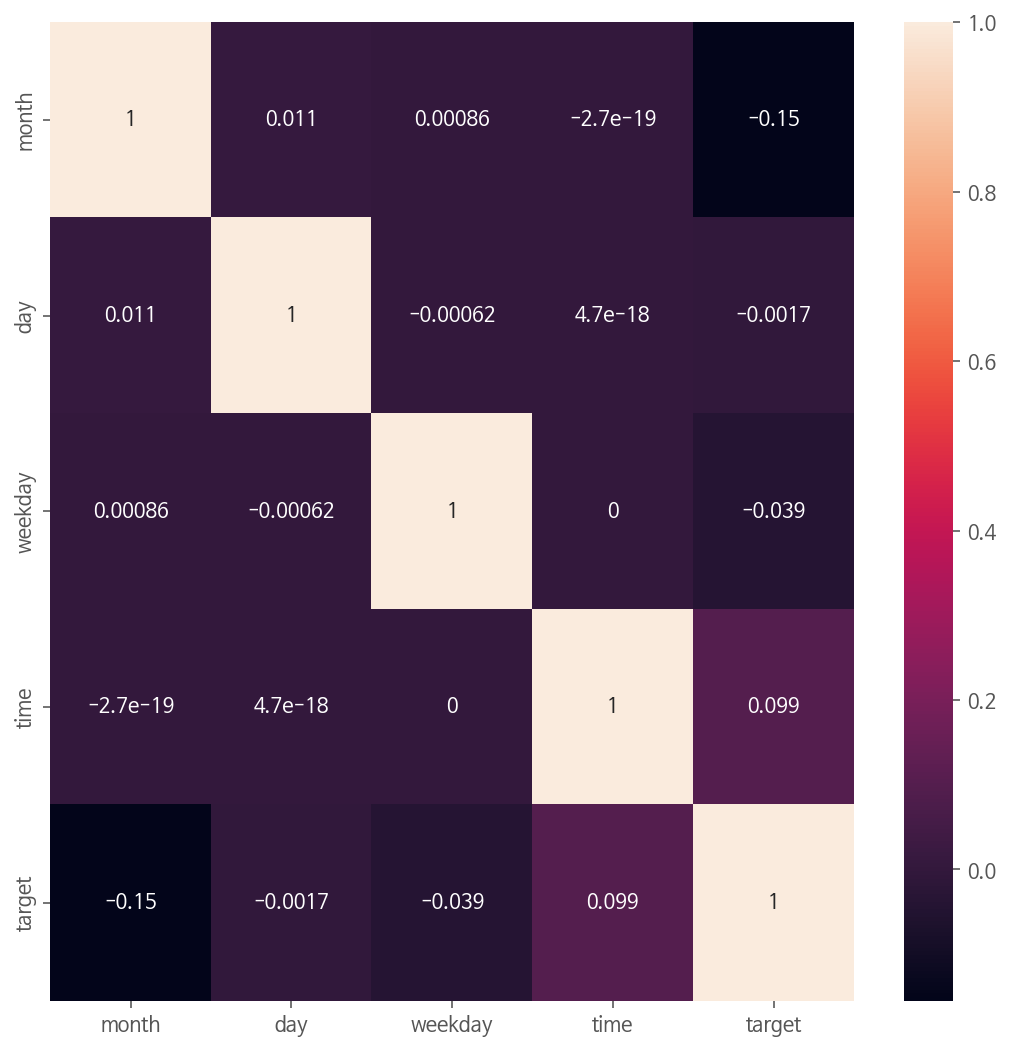

In [ ]:
#Heatmap을 통해 coefficient 확인 => feature selection
import seaborn as sn

feature = ['sep', 'month', 'day', 'weekday', 'time', 'target']
df_co = df[feature]

df_co.corr()

plt.figure(figsize=(9,9))
sn.heatmap(df_co.corr(), annot=True)

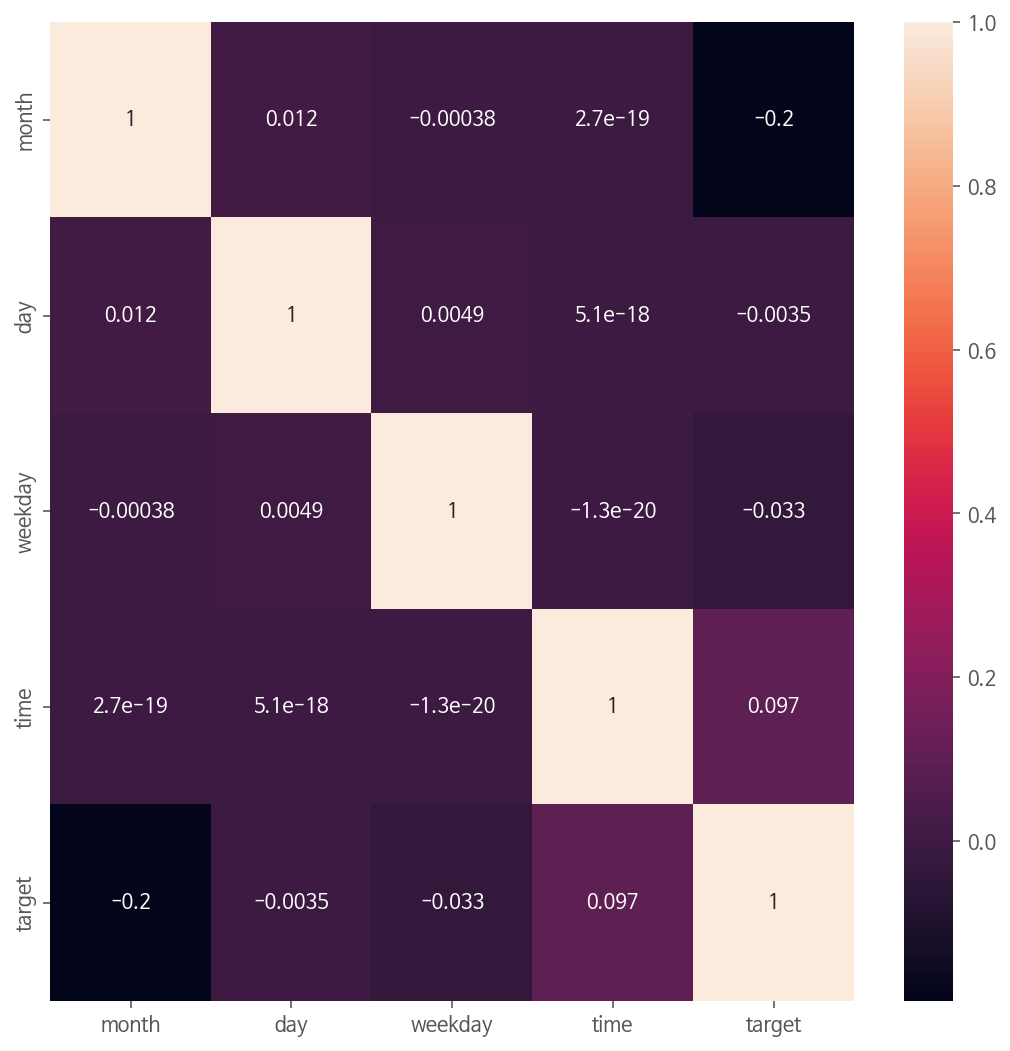

In [ ]:
#Heatmap을 통해 coefficient 확인 => feature selection
import seaborn as sn

feature = ['sep', 'month', 'day', 'weekday', 'time', 'target']
df_2013_co = df_2013[feature]

df_2013_co.corr()

plt.figure(figsize=(9,9))
sn.heatmap(df_2013_co.corr(), annot=True)

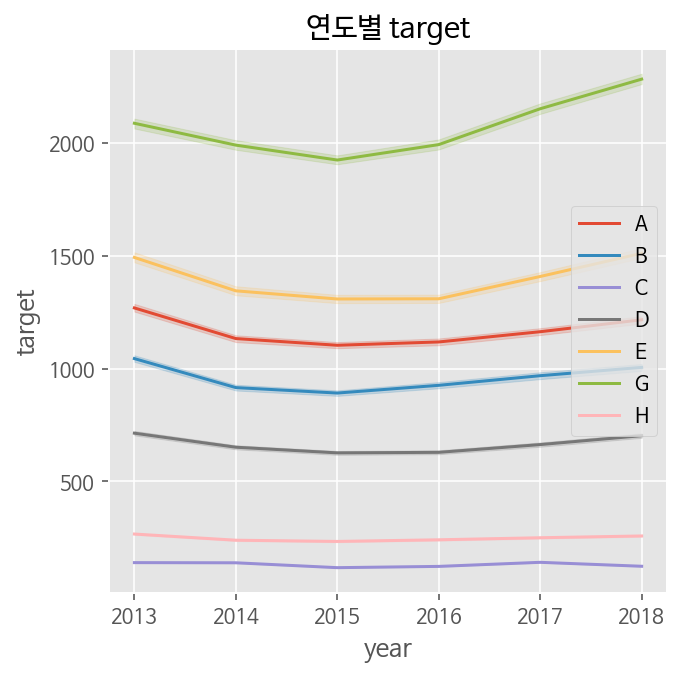

In [60]:
plt.figure(figsize=(5,5))
sns.lineplot(x='year',y='target',data=df,hue='sep')
plt.legend(loc='center right')
plt.title("연도별 target")
plt.show()

In [ ]:
df.head()

,date,time,sep,target,year,month,day,weekday
0,2013-01-01,1,A,2497.129,2013,1,1,1
1,2013-01-01,2,A,2363.265,2013,1,1,1
2,2013-01-01,3,A,2258.505,2013,1,1,1
3,2013-01-01,4,A,2243.969,2013,1,1,1
4,2013-01-01,5,A,2344.105,2013,1,1,1


In [ ]:
df_2013=df[df['year'] == 2013]
df_2014=df[df['year'] == 2014]
df_2015=df[df['year'] == 2015]
df_2016=df[df['year'] == 2016]
df_2017=df[df['year'] == 2017]
df_2018=df[df['year'] == 2018]

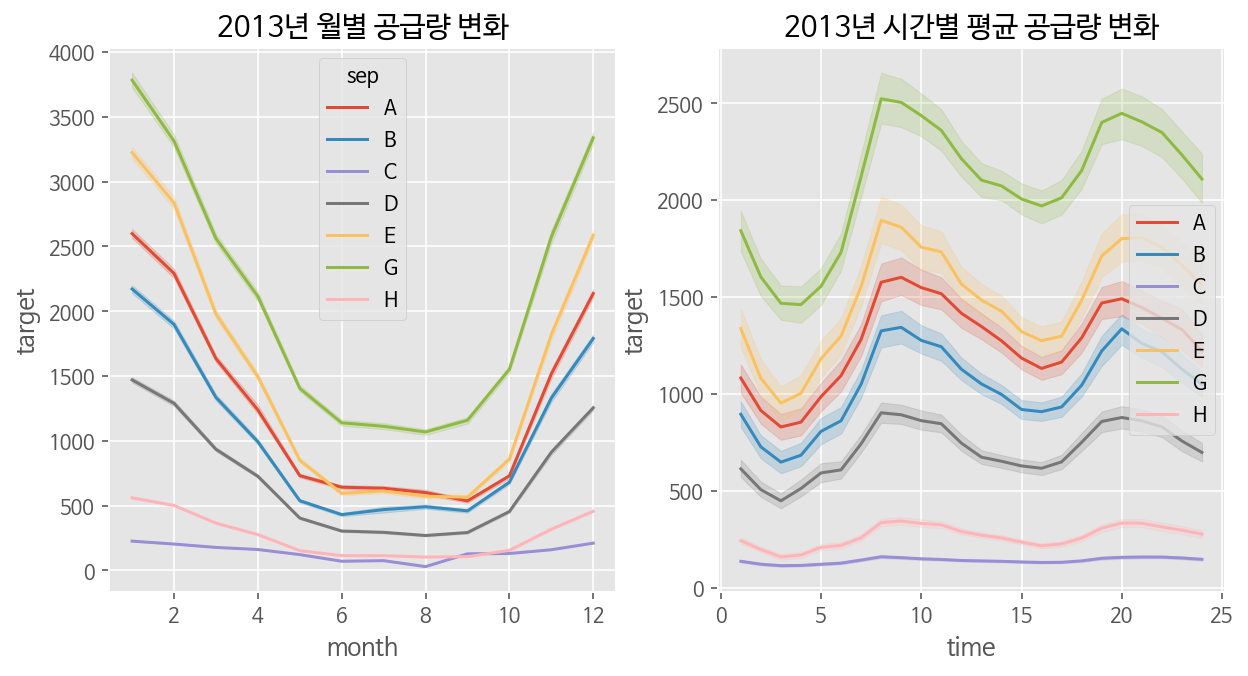

In [65]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
l1= sns.lineplot(x='month',y='target',data=df_2013,hue='sep',ax=ax[0])
l1.set_title('2013년 월별 공급량 변화')
l2 = sns.lineplot(x='time',y='target',data=df_2013,hue='sep',ax = ax[1])
l2.set_title('2013년 시간별 평균 공급량 변화')
plt.legend(loc='center right')
plt.show()

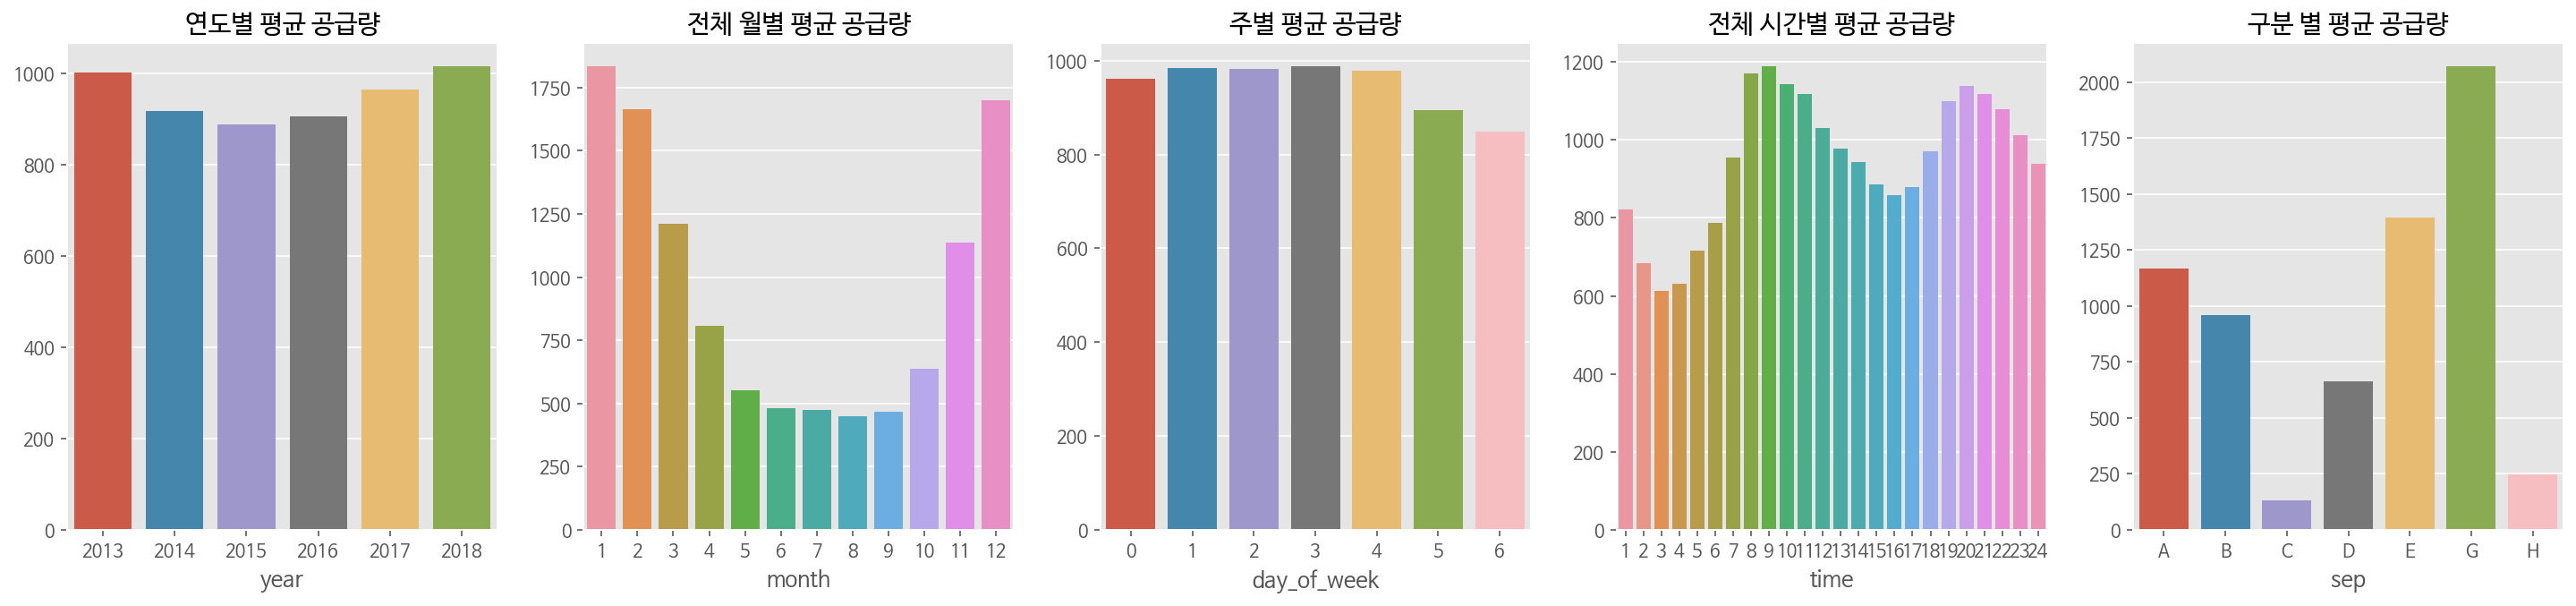

In [63]:
f, ax = plt.subplots(1, 5, figsize=(25, 5))
g1 = sns.barplot(x=df.groupby('year')['target'].mean().index, y=df.groupby('year')['target'].mean().values, ax=ax[0])
g1.set_title('연도별 평균 공급량')
g2 = sns.barplot(x=df.groupby('month')['target'].mean().index, y=df.groupby('month')['target'].mean().values, ax=ax[1])
g2.set_title('전체 월별 평균 공급량')
g3 = sns.barplot(x=df.groupby('day_of_week')['target'].mean().index, y=df.groupby('day_of_week')['target'].mean().values, ax=ax[2])
g3.set_title('주별 평균 공급량')
g4 = sns.barplot(x=df.groupby('time')['target'].mean().index, y=df.groupby('time')['target'].mean().values, ax=ax[3])
g4.set_title('전체 시간별 평균 공급량')
g5 = sns.barplot(x=df.groupby('sep')['target'].mean().index, y=df.groupby('sep')['target'].mean().values, ax=ax[4])
g5.set_title('구분 별 평균 공급량')
plt.show()

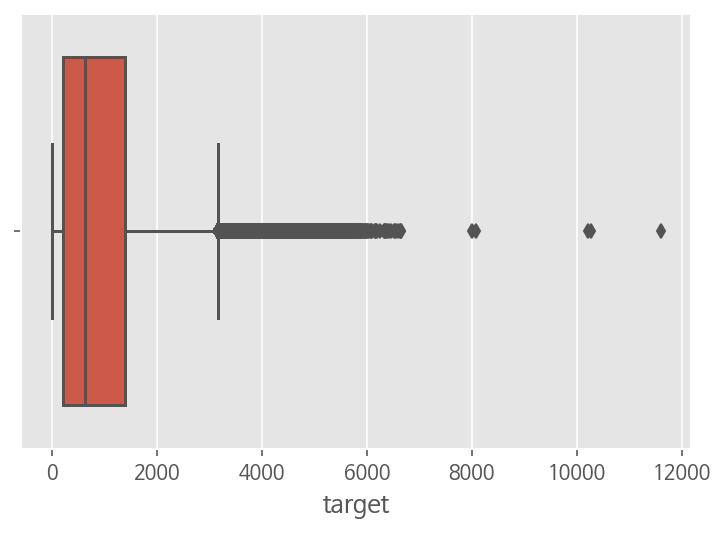

In [66]:
sns.boxplot(x="target", data=df)

In [69]:
le = LabelEncoder()
df['new_sep'] = le.fit_transform(df['sep'])

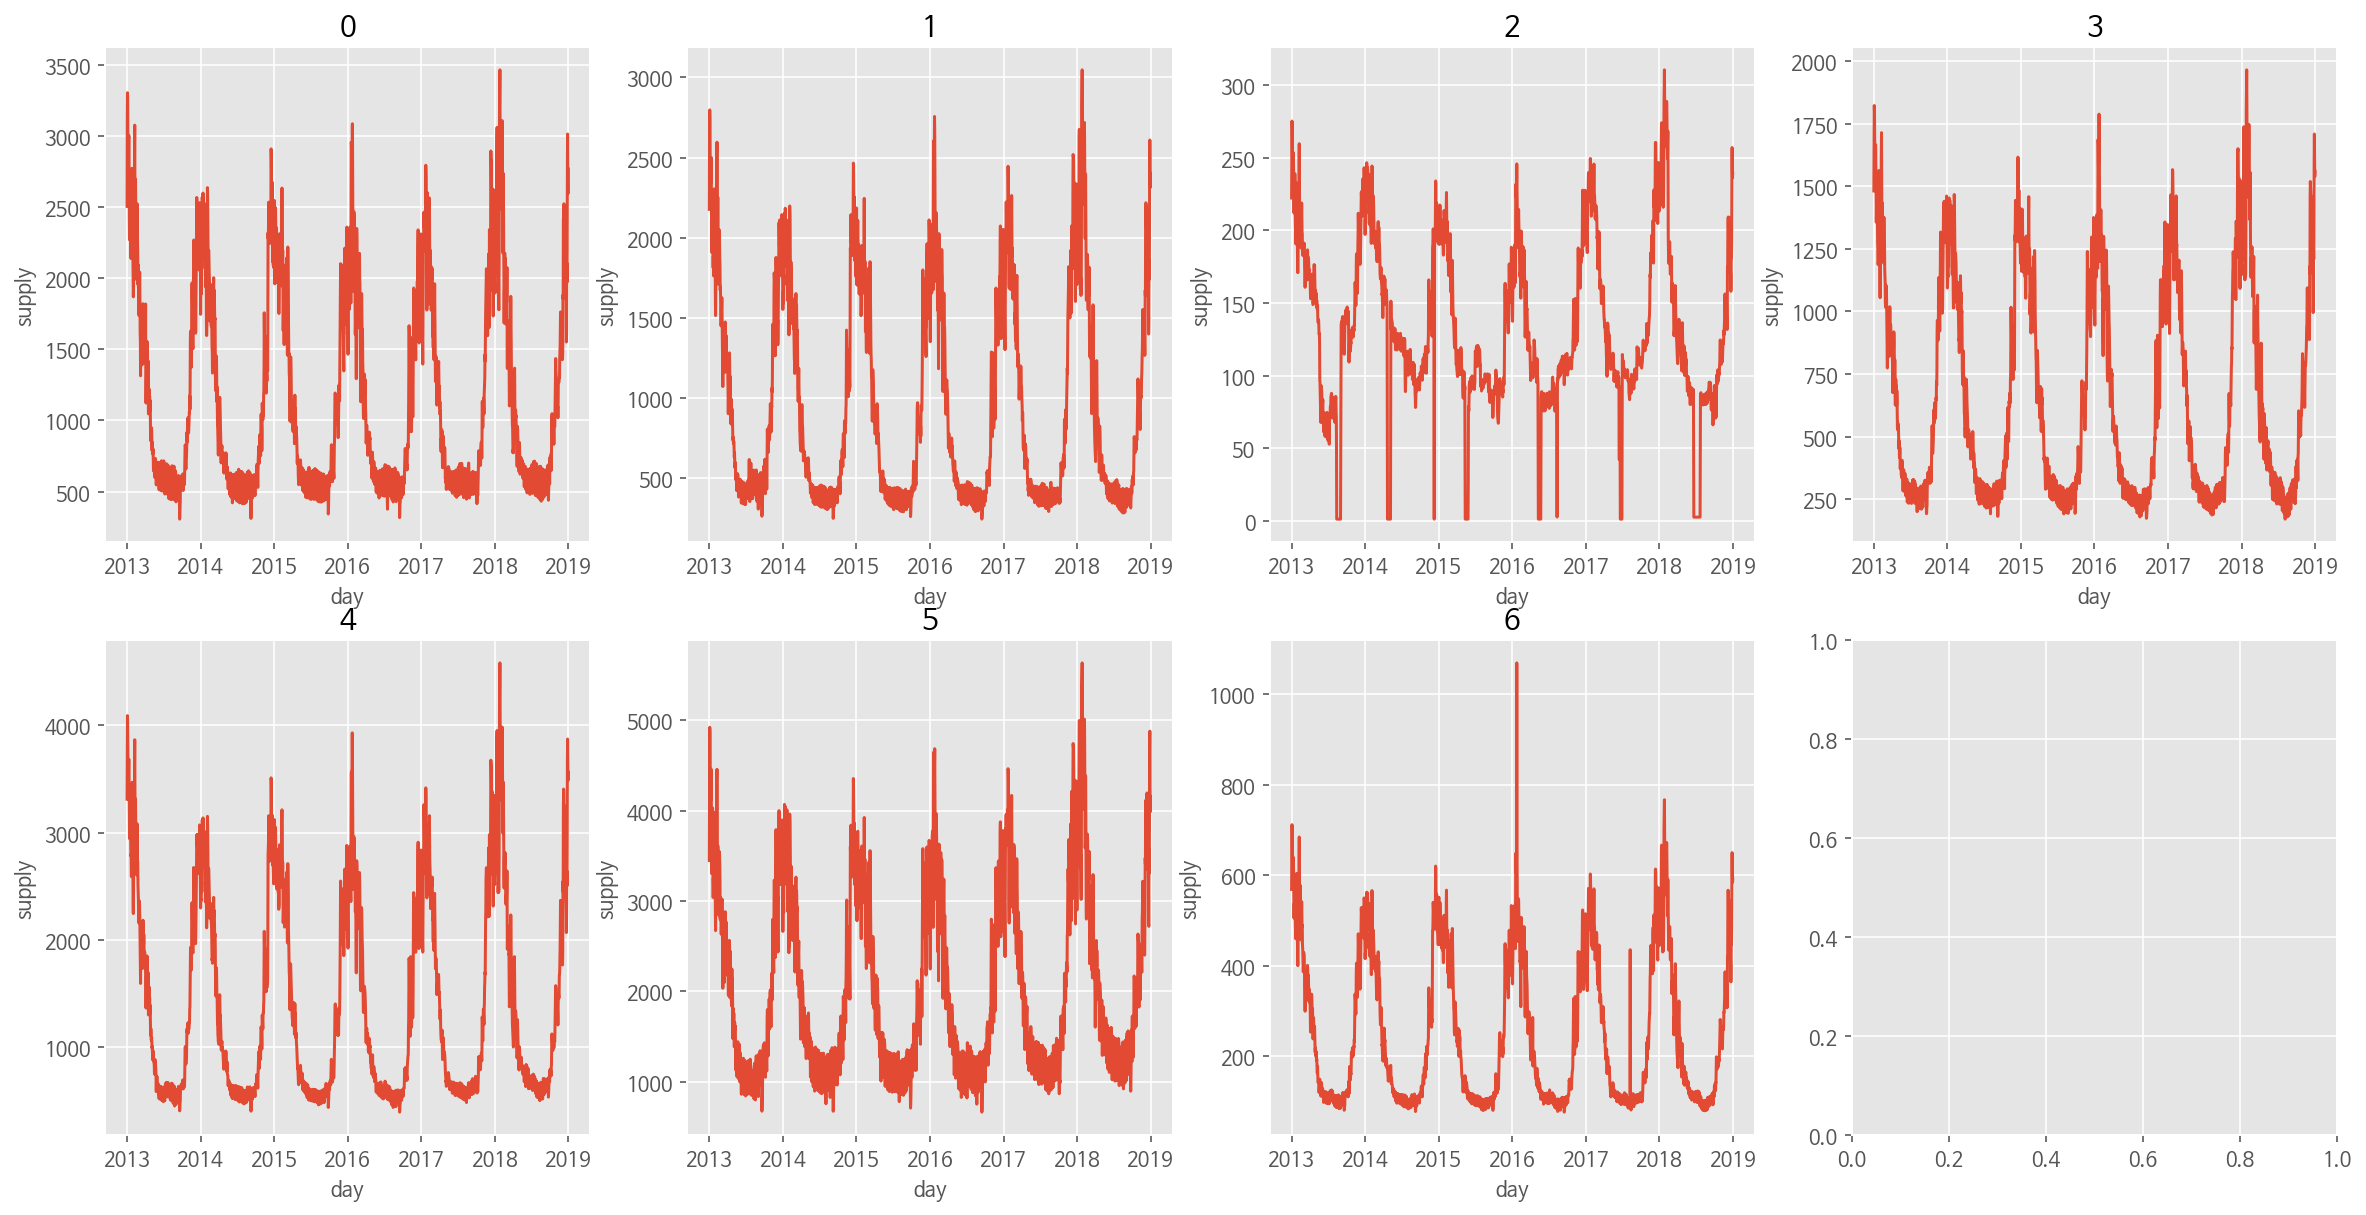

In [70]:
f, ax = plt.subplots(2, 4, figsize=(20, 10))
for i in range(7):
    y_day = df[df.new_sep == i].groupby('date')['target'].mean()
    g = sns.lineplot(x=y_day.index, y=y_day.values, ax=ax[i//4][i%4])
    g.set_xlabel('day', size=10)
    g.set_ylabel('supply', size=10)
    g.set_title(f'{i}')
plt.show()

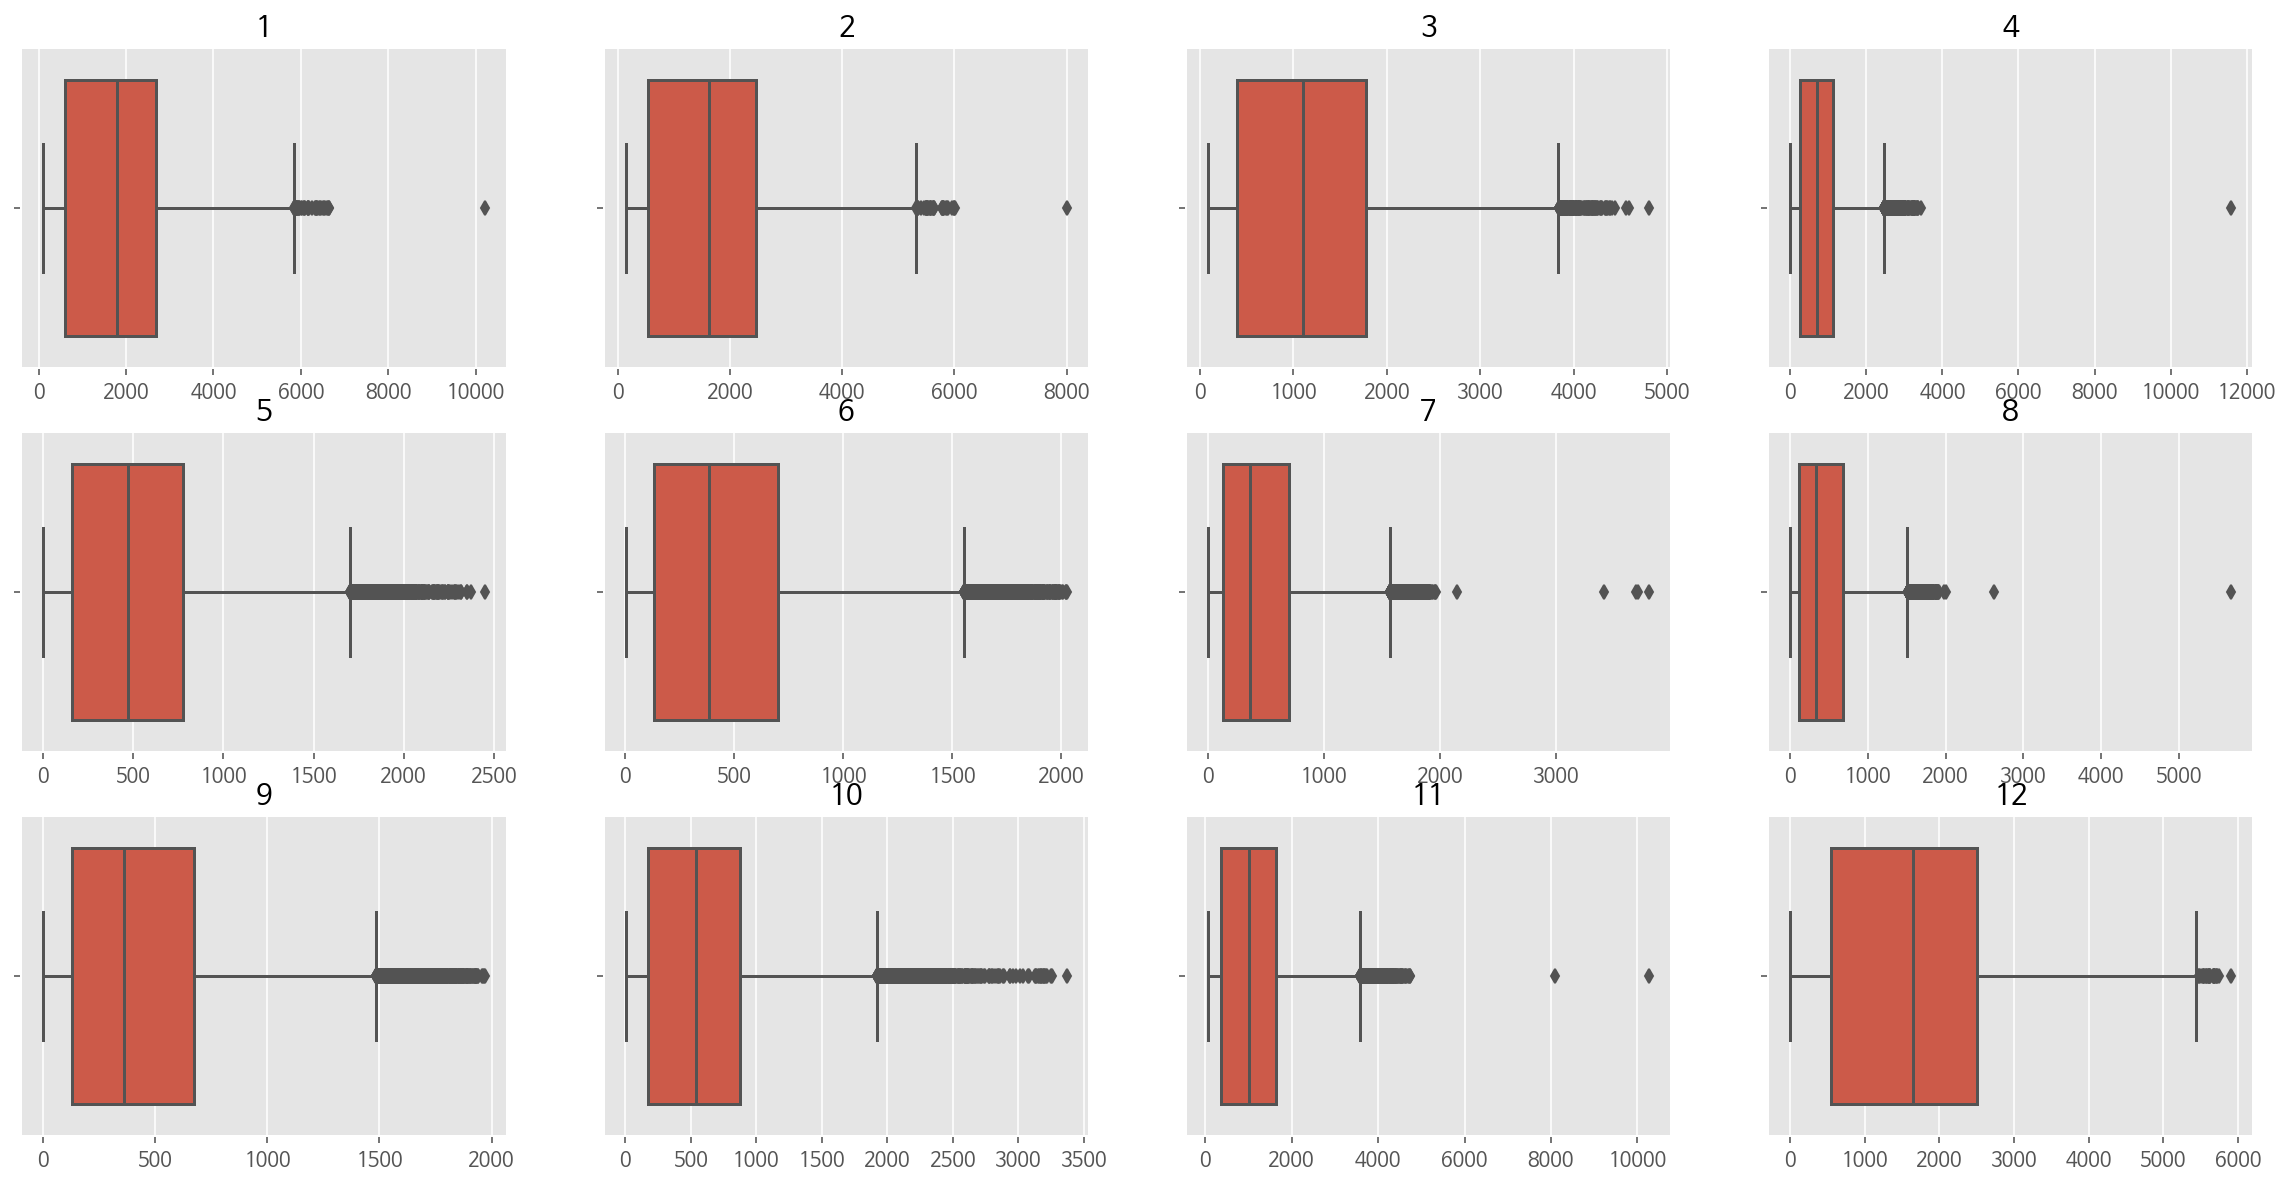

In [74]:
f, ax = plt.subplots(3, 4, figsize=(20, 10))
for i in range(12):
    g = sns.boxplot(df[df.month == i + 1].target, ax=ax[i//4][i%4])
    g.set_title(i + 1)
    g.set_xlabel('')
plt.show()